# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [86]:
df = pd.read_csv("diabetes.csv")

Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [87]:
# display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
# Print 10 rows of dataset
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [89]:
# Remove Pregnancy column
df.drop(["Pregnancies"], axis=1, inplace=True)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [90]:
# Print 10 rows of dataset
df.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.600,0.627,50,1
1,85,66,29,0,26.600,0.351,31,0
2,183,64,0,0,23.300,0.672,32,1
3,89,66,23,94,28.100,0.167,21,0
4,137,40,35,168,43.100,2.288,33,1
5,116,74,0,0,25.600,0.201,30,0
6,78,50,32,88,31.000,0.248,26,1
7,115,0,0,0,35.300,0.134,29,0
8,197,70,45,543,30.500,0.158,53,1
9,125,96,0,0,0.000,0.232,54,1


Step 5 - Write code to clean data

In [91]:
# check for missing values
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [92]:
# List of columns where zeros considered as invalid
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Replace zeros with NaN
for column in columns_with_zeros:
    df[column] = df[column].replace(0, np.nan)

# Fill NaN values with the mean of each column
for column in columns_with_zeros:
    mean = df[column].mean()
    df[column] = df[column].fillna(mean)
df.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.000,72.000,35.000,155.548,33.600,0.627,50,1
1,85.000,66.000,29.000,155.548,26.600,0.351,31,0
2,183.000,64.000,29.153,155.548,23.300,0.672,32,1
3,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,137.000,40.000,35.000,168.000,43.100,2.288,33,1
5,116.000,74.000,29.153,155.548,25.600,0.201,30,0
6,78.000,50.000,32.000,88.000,31.000,0.248,26,1
7,115.000,72.405,29.153,155.548,35.300,0.134,29,0
8,197.000,70.000,45.000,543.000,30.500,0.158,53,1
9,125.000,96.000,29.153,155.548,32.457,0.232,54,1


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [93]:
# Split features(X) and target(y)
X =df.drop('Outcome', axis=1)
y = df['Outcome']

In [94]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step #7: Initialize your model**




In [95]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()


#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [96]:
# Fit the model
model.fit(X_train, y_train)

GaussianNB()

Step 9 - Predict using model on test data

In [97]:
# Make prediction using test data
y_pred = model.predict(X_test)

Step 10 -  Find accuracy of model

In [98]:
# Calculate accuracy and print
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.75


Step 11 - Confusion Matrix

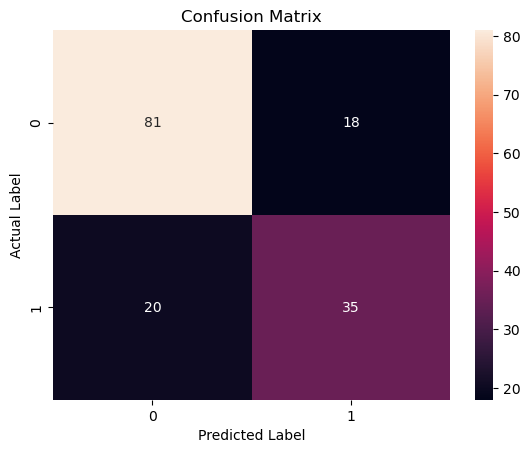

In [99]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()